# Pandas

Pandas är ett Python-bibliotek för att hantera strukturerad data (t.ex. excel/csv-filer). Det erbjuder verktyg för statistik, bekväma funktioner för att importera data och möjligheten att filtrera och extrahera information. Huvudstrukturen i Pandas kallas "DataFrame". Med en DataFrame kan du lagra och manipulera tabulära data, liknande ett Excel-ark. Den fungerar på sätt som liknar en generalisering av dictionaries för att associera fler än 2 objekt, och på andra sätt liknar den en 2D numpy-array.

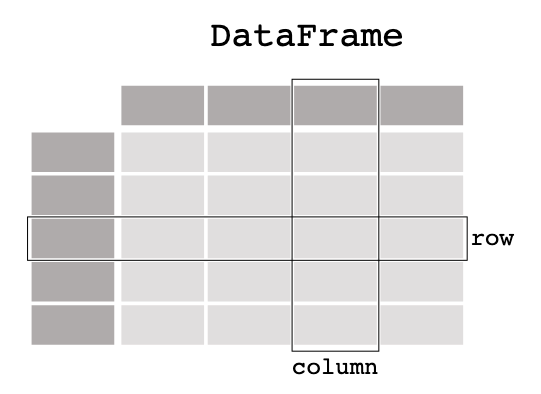

Till skillnad från en NumPy-array kan en DataFrame innehålla olika datatyper, som exempelvis nummer och text, men datan i varje kolumn måste vara av samma typ.

## Skapa en DataFrame

En DataFrame kan läsas in från olika datakällor, till exempel CSV-filer eller Excel-filer (genom att använda funktionen read_csv()), eller så kan den skapas från grunden. Till exempel kan vi skapa ett dataset som innehåller information om kemiska föreningar, såsom molekylvikter, kokpunkter och lösligheter:

In [1]:
import pandas as pd

data = {
    'Compound': ['Water', 'Ethanol', 'Benzene', 'Methanol', 'Acetone', 'Toluene', 'Tetrachloroethylene'],
    'MolecularWeight': [18.015, 46.07, 78.1134, 32.042, 58.08, 92.14, 165.8],
    'BoilingPoint': [100, 78.37, 80.1, 64.7, 56.08, 110.6, 121.2],
    'Solubility': ['Infinite', 'Miscible', '0.178 g/100 mL', 'Miscible', 'Miscible', 'None', '206 mg/L']
}

df = pd.DataFrame(data)
print(df)

              Compound  MolecularWeight  BoilingPoint      Solubility
0                Water          18.0150        100.00        Infinite
1              Ethanol          46.0700         78.37        Miscible
2              Benzene          78.1134         80.10  0.178 g/100 mL
3             Methanol          32.0420         64.70        Miscible
4              Acetone          58.0800         56.08        Miscible
5              Toluene          92.1400        110.60            None
6  Tetrachloroethylene         165.8000        121.20        206 mg/L


In [2]:
df

,Compound,MolecularWeight,BoilingPoint,Solubility
0,Water,18.0150,100.00,Infinite
1,Ethanol,46.0700,78.37,Miscible
2,Benzene,78.1134,80.10,0.178 g/100 mL
3,Methanol,32.0420,64.70,Miscible
4,Acetone,58.0800,56.08,Miscible
5,Toluene,92.1400,110.60,None
6,Tetrachloroethylene,165.8000,121.20,206 mg/L


Vi kan visa endast de första raderna med `head` (eller de sista genom att använda `tail`):

In [3]:
df.head()

,Compound,MolecularWeight,BoilingPoint,Solubility
0,Water,18.0150,100.00,Infinite
1,Ethanol,46.0700,78.37,Miscible
2,Benzene,78.1134,80.10,0.178 g/100 mL
3,Methanol,32.0420,64.70,Miscible
4,Acetone,58.0800,56.08,Miscible


# Åtkomst och modifiering av data

Precis som med numpy kan vi få åtkomst till formen på en DataFrame.

In [4]:
print(df.shape)

(7, 4)


Du kan också få åtkomst till en lista över kolumnerna.

In [5]:
print(df.columns)

Index(['Compound', 'MolecularWeight', 'BoilingPoint', 'Solubility'], dtype='object')


För att komma åt data i en DataFrame kan vi använda olika metoder och indexeringsfunktioner. 

De två viktigaste funktionerna för att få åtkomst till data är `.loc`, som tar namnet på rader/kolumner (som i en dictionary):

In [6]:
df.loc[0,'MolecularWeight'] #rad 0, kolumn 'MolecularWeight'

18.015

och iloc, som istället tar index (som i numpy):

In [7]:
df.iloc[0,1]

18.015

Observera att här är namnen på raderna helt enkelt index, vilket är standard. Men vi kan välja en specifik kolumn att bli namnet på raderna:

In [8]:
df_compound = df.set_index('Compound')
df_compound

,MolecularWeight,BoilingPoint,Solubility
Compound,,,
Water,18.0150,100.00,Infinite
Ethanol,46.0700,78.37,Miscible
Benzene,78.1134,80.10,0.178 g/100 mL
Methanol,32.0420,64.70,Miscible
Acetone,58.0800,56.08,Miscible
Toluene,92.1400,110.60,None
Tetrachloroethylene,165.8000,121.20,206 mg/L


In [9]:
df_compound.loc['Water','MolecularWeight']

18.015

`loc` och `iloc` tillåter användning av slicing:

In [10]:
print(df.loc[:, 'MolecularWeight']) #en kolumn

0     18.0150
1     46.0700
2     78.1134
3     32.0420
4     58.0800
5     92.1400
6    165.8000
Name: MolecularWeight, dtype: float64


In [11]:
print(df.loc[:,['MolecularWeight', 'BoilingPoint']]) #två kolumner

   MolecularWeight  BoilingPoint
0          18.0150        100.00
1          46.0700         78.37
2          78.1134         80.10
3          32.0420         64.70
4          58.0800         56.08
5          92.1400        110.60
6         165.8000        121.20


In [12]:
df.loc[0,:] #en rad

Compound              Water
MolecularWeight      18.015
BoilingPoint          100.0
Solubility         Infinite
Name: 0, dtype: object

In [13]:
print(df.iloc[:4, :2])

   Compound  MolecularWeight
0     Water          18.0150
1   Ethanol          46.0700
2   Benzene          78.1134
3  Methanol          32.0420


För att få en specifik kolumn kan du också använda enklare åtkomst i dictionary-stil:

In [14]:
print(df['MolecularWeight'])

0     18.0150
1     46.0700
2     78.1134
3     32.0420
4     58.0800
5     92.1400
6    165.8000
Name: MolecularWeight, dtype: float64


eller till och med, förutsatt att du använt ett namn utan mellanslag:

In [15]:
df.MolecularWeight

0     18.0150
1     46.0700
2     78.1134
3     32.0420
4     58.0800
5     92.1400
6    165.8000
Name: MolecularWeight, dtype: float64

För att filtrera DataFrame baserat på en given villkor kan du använda boolean-indexering. Till exempel, för att hitta och välja alla molekyler med en vikt över 50 och spara dem i en ny DataFrame:

In [16]:
filtered_df = df[df['MolecularWeight'] > 50]
filtered_df

,Compound,MolecularWeight,BoilingPoint,Solubility
2,Benzene,78.1134,80.10,0.178 g/100 mL
4,Acetone,58.0800,56.08,Miscible
5,Toluene,92.1400,110.60,None
6,Tetrachloroethylene,165.8000,121.20,206 mg/L


Det finns många sätt att ändra en befintlig DataFrame efter att den har skapats. Du kan till exempel byta namn på rader eller kolumner:

In [17]:
df.rename(columns={"Compound": "Name"})

,Name,MolecularWeight,BoilingPoint,Solubility
0,Water,18.0150,100.00,Infinite
1,Ethanol,46.0700,78.37,Miscible
2,Benzene,78.1134,80.10,0.178 g/100 mL
3,Methanol,32.0420,64.70,Miscible
4,Acetone,58.0800,56.08,Miscible
5,Toluene,92.1400,110.60,None
6,Tetrachloroethylene,165.8000,121.20,206 mg/L


Du kan lägga till nya kolumner i befintliga DataFrames. Till exempel, för att konvertera kokpunkterna från Celsius till Fahrenheit och lägga till detta som en ny kolumn:

In [18]:
df['BoilingPoint (°F)'] = df['BoilingPoint']*1.8 + 32
df.head()

,Compound,MolecularWeight,BoilingPoint,Solubility,BoilingPoint (°F)
0,Water,18.0150,100.00,Infinite,212.000
1,Ethanol,46.0700,78.37,Miscible,173.066
2,Benzene,78.1134,80.10,0.178 g/100 mL,176.180
3,Methanol,32.0420,64.70,Miscible,148.460
4,Acetone,58.0800,56.08,Miscible,132.944


Du kan också ta bort rader eller kolumner:

In [19]:
dropped = df.drop(columns = "BoilingPoint (°F)")
dropped

,Compound,MolecularWeight,BoilingPoint,Solubility
0,Water,18.0150,100.00,Infinite
1,Ethanol,46.0700,78.37,Miscible
2,Benzene,78.1134,80.10,0.178 g/100 mL
3,Methanol,32.0420,64.70,Miscible
4,Acetone,58.0800,56.08,Miscible
5,Toluene,92.1400,110.60,None
6,Tetrachloroethylene,165.8000,121.20,206 mg/L


Ofta kan pandas-funktioner antingen returnera en ny DataFrame eller utföra operationen direkt på plats (i befintlig DataFrame):

In [20]:
df.drop(columns = "BoilingPoint (°F)", inplace=True)
df

,Compound,MolecularWeight,BoilingPoint,Solubility
0,Water,18.0150,100.00,Infinite
1,Ethanol,46.0700,78.37,Miscible
2,Benzene,78.1134,80.10,0.178 g/100 mL
3,Methanol,32.0420,64.70,Miscible
4,Acetone,58.0800,56.08,Miscible
5,Toluene,92.1400,110.60,None
6,Tetrachloroethylene,165.8000,121.20,206 mg/L


## Built-in analysis functions

You can get statistical analysis for specific columns: 

In [21]:
print("The mean molecular weight is",df['MolecularWeight'].mean())
print("The standard deviation is", df['MolecularWeight'].std())

The mean molecular weight is 70.0372
The standard deviation is 49.31466729361561


To print summary statistics for each (numeric) column in the DataFrame, use describe():

In [22]:
df.describe()

,MolecularWeight,BoilingPoint
count,7.000000,7.000000
mean,70.037200,87.292857
std,49.314667,24.050028
min,18.015000,56.080000
25%,39.056000,71.535000
50%,58.080000,80.100000
75%,85.126700,105.300000
max,165.800000,121.200000


It is possible to sort the DataFrame, for example, based on a particular column, using sort_values(). To sort the compounds based on their molecular weights in ascending order: 

In [24]:
sorted_df = df.sort_values('MolecularWeight', ascending=True)
sorted_df

,Compound,MolecularWeight,BoilingPoint,Solubility
0,Water,18.0150,100.00,Infinite
3,Methanol,32.0420,64.70,Miscible
1,Ethanol,46.0700,78.37,Miscible
4,Acetone,58.0800,56.08,Miscible
2,Benzene,78.1134,80.10,0.178 g/100 mL
5,Toluene,92.1400,110.60,None
6,Tetrachloroethylene,165.8000,121.20,206 mg/L


Pandas also has built-in matplotlib functions to quickly plot specific columns for example:

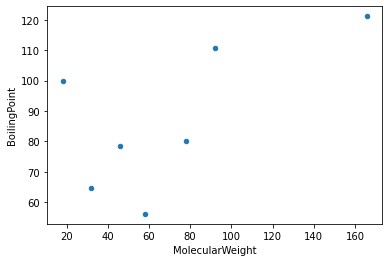

In [25]:
axes = df.plot("MolecularWeight", "BoilingPoint", kind="scatter")

While all of this has obvious usage for sorting and selecting data, the indexes offer some really neat usage if they are values instead of names. To illustrate this lets generate some data and put the x-values of it into the index. 

In [26]:
import numpy as np
import pandas
x_values = np.arange(-10,10,0.1)  #generate an x-vector
df_function={}   # generate an empty dictionary and we will use the peak center as index
df_function['0'] = np.exp(-x_values**2)
df_function['1'] = np.exp(-(x_values-1)**2)
df_function['2'] = np.exp(-(x_values-2)**2)
df_function = pandas.DataFrame(df_function,index=x_values)
df_function

,0,1,2
-10.0,3.720076e-44,2.820770e-53,2.894640e-63
-9.9,2.721434e-43,2.520418e-52,3.159064e-62
-9.8,1.951452e-42,2.207454e-51,3.379375e-61
-9.7,1.371615e-41,1.895068e-50,3.543467e-60
-9.6,9.449755e-41,1.594674e-49,3.641954e-59
...,...,...,...
9.5,6.381503e-40,4.190093e-32,3.723363e-25
9.6,9.449755e-41,7.578445e-33,8.225281e-26
9.7,1.371615e-41,1.343540e-33,1.781067e-26
9.8,1.951452e-42,2.334723e-34,3.780278e-27


If directly created like this the index is of type float. If this is generated from other datatype one typically can convert the index into float using this command

In [27]:
df_function.index=df_function.index.astype(float)
df_function.index.dtype

dtype('float64')

With the index as float, plotting gets very neat

### task: 

test what "df_function.plot()" returns<br>
and then give your index a name with df_function.index.name='x-values'<br>
and test again what the plot returns

In [28]:
# enter code here

<AxesSubplot:>

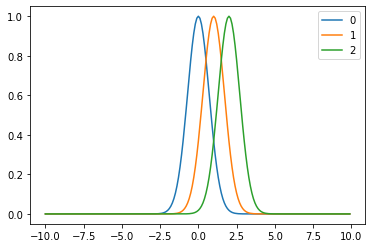

In [29]:
df_function.plot()

finally having either of the  indexes as numbers one can slice by value. Test what these return<br>
df_function[:-1]<br>
df_function[-1:1]<br>
df_function.loc[-1:1,:]<br>

In [30]:
# enter code here

the really cool thing is that you do not even have to have the right numbers in your slices. show that the following slice will work just as you expect:<br>

df_function[0.01:0.2].plot()  <br>

Now write for yourself, which steps the interpretation would have to do to achieve this. The start could be:<br> 
find in the index the position of the index that is closest to 0.01 and then.... 


Using a value like this as index is also very powerful when reading data that was e.g. measured by a machine. The following code reads data from a webpage and converts it into a DataFrame. The column names are the parameter used for this function. Using slicing to plot only the measurements where the parameter is between 10 and 20. Important, you will need to sort the column index first. This is easiest done while using the option "inplace=True".

<AxesSubplot:xlabel='x-value'>

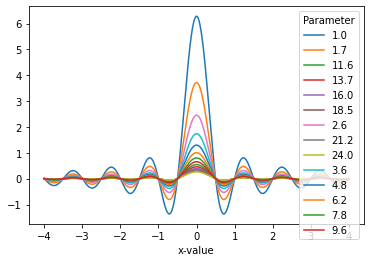

In [31]:
df_sinc=pd.read_csv("http://www.jensuhlig.de/Kemm30/sinc.dat",index_col=0)
df_sinc.columns=df_sinc.columns.astype(float)  #convert the column entries from string to float
df_sinc.index=df_sinc.index.astype(float)      #convert the index entries from string to float
df_sinc.columns.name='Parameter'
df_sinc.plot()

In [32]:
# enter your code here.

This reading function is very powerful and can through its many option even process very complicated files. Look at this file on the internet "http://www.jensuhlig.de/Kemm30/APS_Copper_SolarCell.dat" That was measured at a large scale research facility. From this file we want to: <br>
ignore the first 29 row <br>
then separate the columns by as many white characters as there are using "\s+" as a separator<br>
then only read the columns named "Energy" and "PR" which we counted to be columns 2 and 14<br>
Given them the right name and use the "Energy" as index.

<AxesSubplot:xlabel='Energy'>

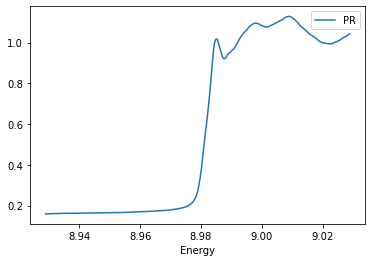

In [33]:
df_aps_manual=pd.read_csv("http://www.jensuhlig.de/Kemm30/APS_Copper_SolarCell.dat",skiprows=30,sep='\s+',names=['Energy','PR'],index_col=0,usecols=[2,14])
df_aps_manual.plot()

With time one learns more and more of the functions offered in the reading tools and can e..g simplify the same task with:

<AxesSubplot:xlabel='Energy'>

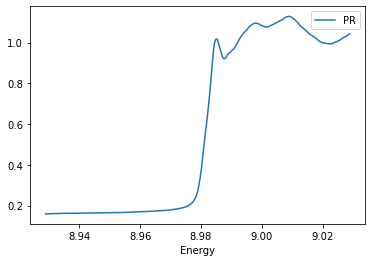

In [34]:
df_aps_automatic=pd.read_csv("http://www.jensuhlig.de/Kemm30/APS_Copper_SolarCell.dat",skiprows=29,escapechar='L',sep='\s+',index_col=0,usecols=['Energy','PR'])
df_aps_automatic.plot()

In [35]:
### Task plot this function between 8.96 and 9.0 

Advanced aggregation. It is possible to group and aggregate data based on a specific property. This can be useful for analyzing data. The function that is used for this is called "groupby". <br>
"Groupby" takes so called categorized data, meaning data that can be placed into a group, and does something to all entries in this group. As an example: in our we could use the solubility. This solubility is clearly separated into missiple, inmissible and other values.

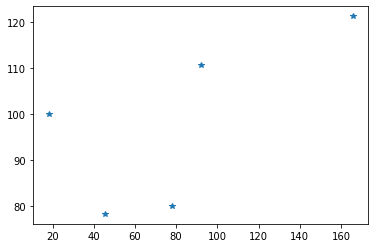

In [36]:
#Group by solubility
grouped_df = df.groupby('Solubility') 
# a grouped_df is a structure that is sorted by the groups. 
# In data analysis this is also called a "pipe" = pipeline for further analysis.

#Calculate the mean molecular weight for each group
mean_mw = grouped_df['MolecularWeight'].mean()

#Calculate the maximum boiling point for each group
max_bp = grouped_df['BoilingPoint'].max()

# plot the two values vs each other as a test
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
ax.plot(mean_mw,max_bp,'*')

EXERCISE: Analyzing Chemical Data with Pandas

Provide the students with a CSV file named "chemical_data.csv" containing information about different chemical compounds. The dataset includes the following columns: 

CompoundName
MolecularWeight
BoilingPoint
Solubility

Use Pandas to read the chemical_data.csv file and create a DataFrame. Explore the first few rows of the DataFrame.

1) Find the compound with the highest boiling point using Pandas
2) Print the compounds with a solubility greater than 1 g/100 mL
3) Calculate the average molecular weight of the compounds and save this as a new column
4) Write the DataFrame to file using to_csv(). 

Pandas can also be combined with other libraries such as Matplotlib to visualise the data. For example, we can create a scatter plot between the molecular weight and the boiling points.

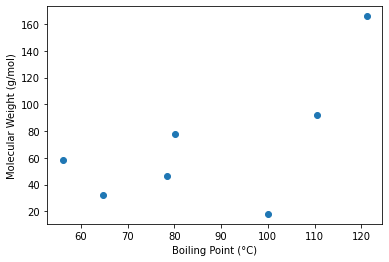

In [37]:
import matplotlib.pyplot as plt

plt.scatter(df['BoilingPoint'], df['MolecularWeight'])
plt.xlabel('Boiling Point (°C)')
plt.ylabel('Molecular Weight (g/mol)')
plt.show()

Here, we will used the cheminformatics library RDKit to calculate descriptors for a dataset containing chemical structures in the form of smiles. 

### Note!! Here you need to have installed rdkit (not included in anaconda)  (see [here](https://www.rdkit.org/docs/Install.html))

In [38]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors

#Read the dataset as SMILES string < TO BE DONE
df = pd.read_csv('smiles.csv')

def calculate_descriptor(smiles, descriptor): 
    mol = Chem.MolFromSmiles(smiles) # Load the molecule from the SMILES string
    return descriptor()

df['MolecularWeight'] = df['SMILES'].apply(lambda x: calculate_descriptor(x, Descriptors.MolWt))

ModuleNotFoundError: No module named 'rdkit'